In [24]:
import pandas as pd 

In [25]:

df = pd.read_csv('C:\\Users\\dsadm\\Desktop\\isa\\iabg\\Somativa\\dadosacoes.csv', sep=',')


In [26]:
df.head

<bound method NDFrame.head of    nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]>

In [27]:
colunas = {"nome ação":"Nome",
               "preço ação":"preco","qtde cotas":"Quantidade","valor de mercado":"Valor"}

In [28]:
df.rename(columns=colunas,inplace=True)

In [29]:
df.head()

,Nome,preço ação R$,Quantidade,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [30]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
from mpl_toolkits.mplot3d import Axes3D

<Axes: title={'center': 'Nome de ação x Preço da ação'}, xlabel='Nome', ylabel='preço ação R$'>

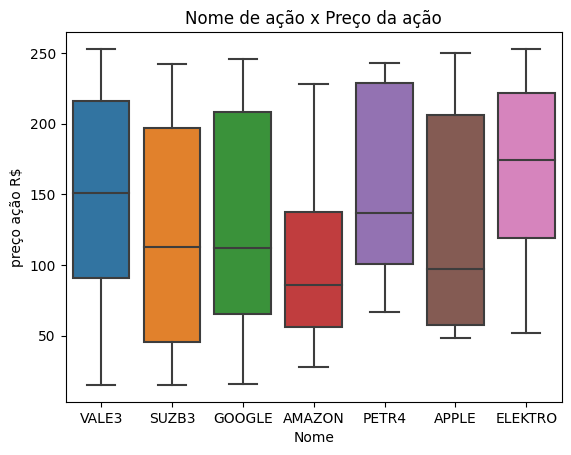

In [31]:

plt.title("Nome de ação x Preço da ação")
sns.boxplot(x=df['Nome'], y=df['preço ação R$'])


In [32]:
df.info

<bound method DataFrame.info of       Nome  preço ação R$  Quantidade  valor de mercado R$ -(Bilhões)
0    VALE3            194          45                            2134
1    SUZB3             91          71                            3069
2    SUZB3            165          41                            2815
3    SUZB3             56          34                            3613
4   GOOGLE            212           9                            2975
..     ...            ...         ...                             ...
95   SUZB3            208          78                            3035
96   VALE3            253          60                            3263
97  GOOGLE             99          35                             980
98   VALE3             82          43                            1866
99   VALE3            111          19                             230

[100 rows x 4 columns]>

In [33]:
df.describe

<bound method NDFrame.describe of       Nome  preço ação R$  Quantidade  valor de mercado R$ -(Bilhões)
0    VALE3            194          45                            2134
1    SUZB3             91          71                            3069
2    SUZB3            165          41                            2815
3    SUZB3             56          34                            3613
4   GOOGLE            212           9                            2975
..     ...            ...         ...                             ...
95   SUZB3            208          78                            3035
96   VALE3            253          60                            3263
97  GOOGLE             99          35                             980
98   VALE3             82          43                            1866
99   VALE3            111          19                             230

[100 rows x 4 columns]>

In [34]:
dados = df

In [35]:
dados

,Nome,preço ação R$,Quantidade,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


In [36]:
dados_ativos = pd.get_dummies(dados,columns=['Nome'],drop_first=True)


In [37]:
kmeans = KMeans(n_clusters=5) # aplicando kmeans com 5 clusters
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [38]:
sse = kmeans.inertia_
print(sse)

8707732.134630369


In [39]:
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ 

Text(0, 0.5, 'preço ação R$')

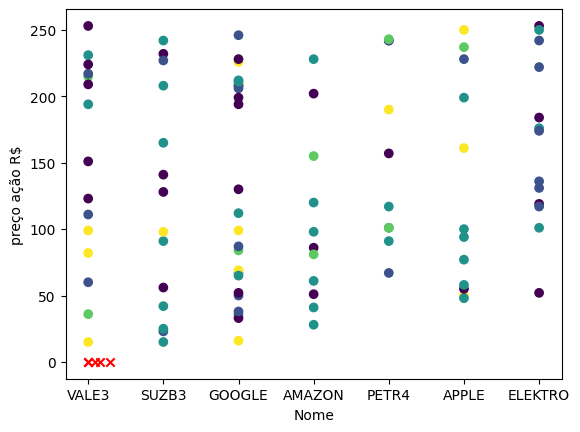

In [40]:
plt.scatter(dados['Nome'],dados['preço ação R$'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Nome")
plt.ylabel("preço ação R$")

Text(0, 0.5, 'Quantidade')

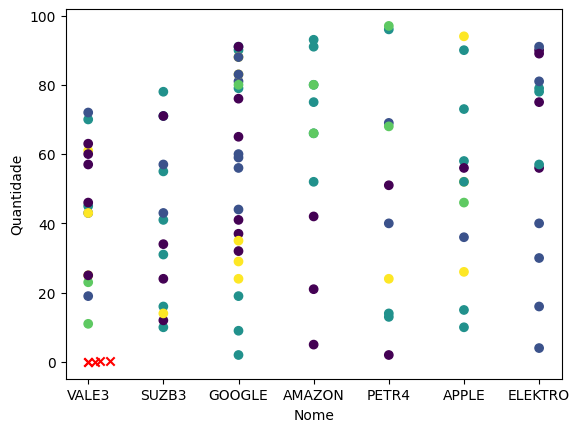

In [41]:
plt.scatter(dados['Nome'],dados['Quantidade'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Nome")
plt.ylabel("Quantidade")

Text(0, 0.5, 'valor de mercado R$ -(Bilhões)')

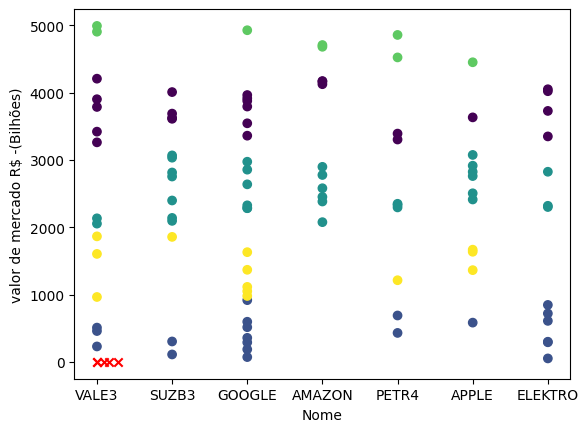

In [42]:
plt.scatter(dados['Nome'],dados['valor de mercado R$ -(Bilhões)'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Nome")
plt.ylabel("valor de mercado R$ -(Bilhões)")

In [43]:
data = pd.get_dummies(dados, columns=['Nome'], drop_first=True)
features = data[['preço ação R$', 'Quantidade', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
data['Cluster'] = kmeans.labels_

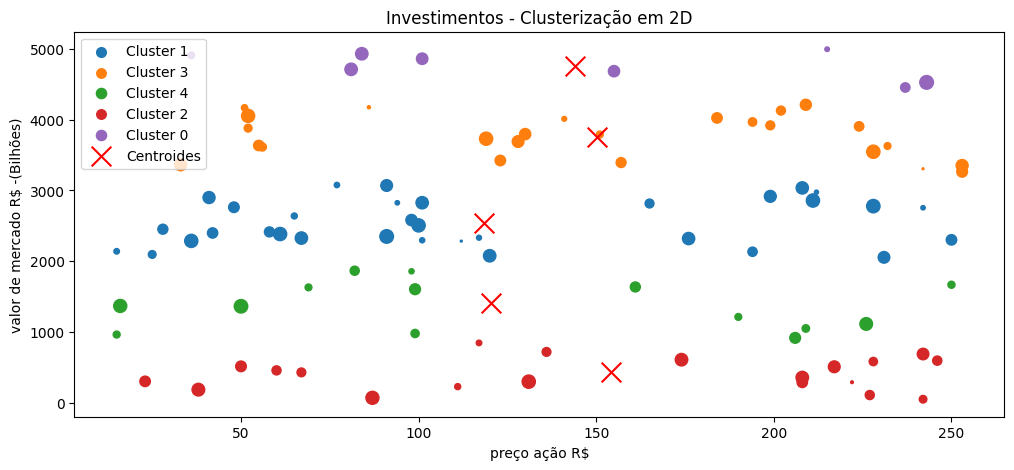

In [47]:
import matplotlib.pyplot as plt

# Plot em 2D com os pontos do cluster
plt.figure(figsize=(12, 5))

# Scatter plot dos pontos do cluster
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['Quantidade'],
                label=f'Cluster {cluster}')

# Scatter plot dos centroides
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', color='red', s=200, label='Centroides')

plt.xlabel('preço ação R$')
plt.ylabel('valor de mercado R$ -(Bilhões)')
plt.title('Investimentos - Clusterização em 2D')
plt.legend()
plt.show()


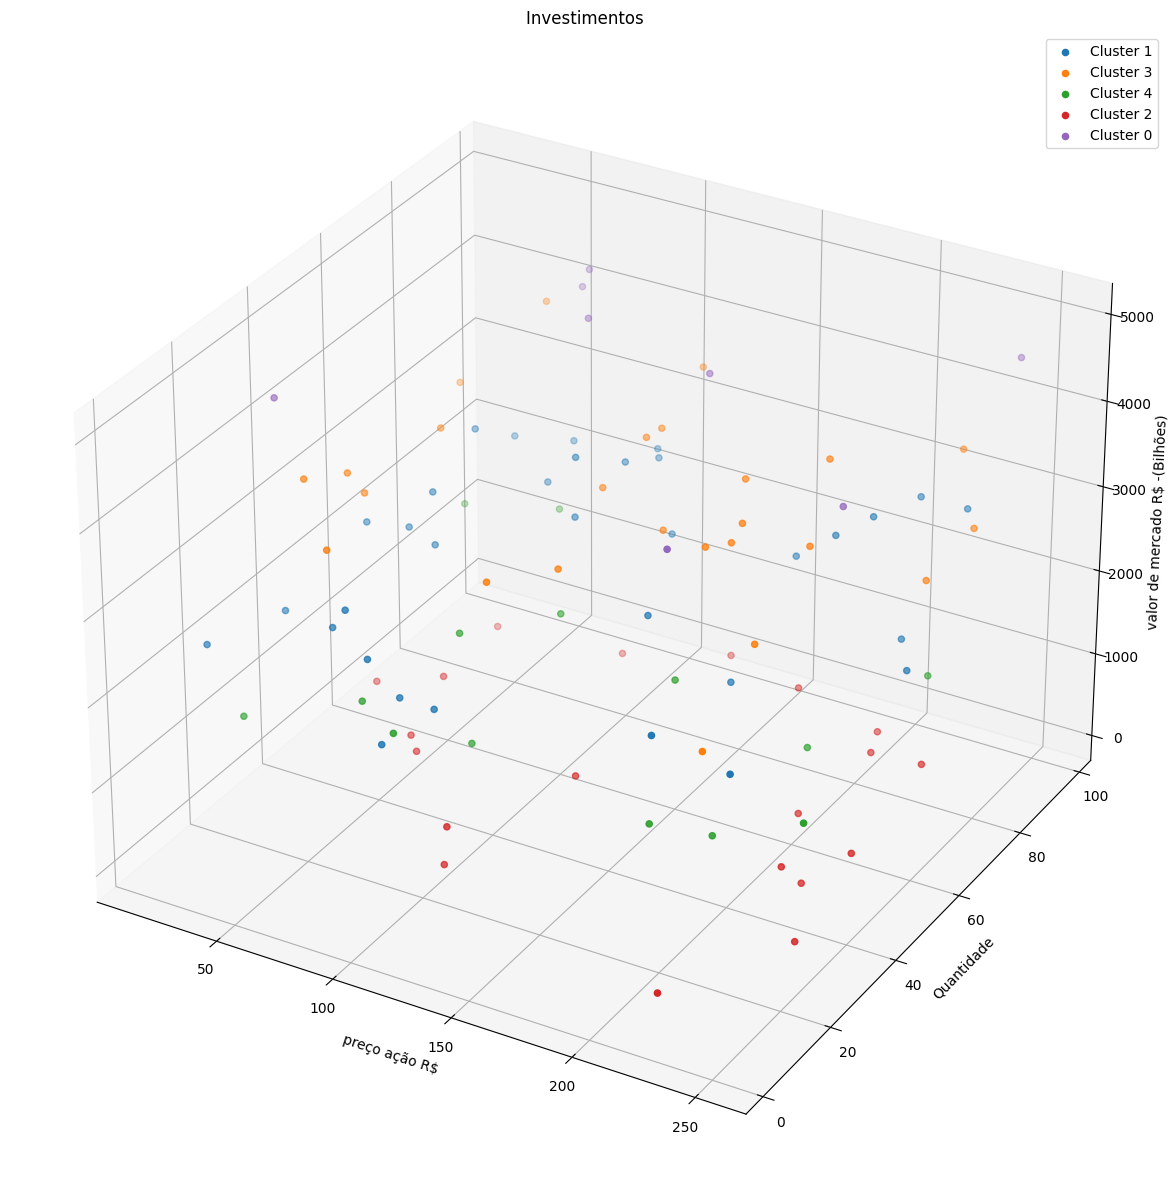

         preço ação R$  Quantidade  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           144.000000   58.875000                     4757.250000   
1           118.303030   54.515152                     2544.333333   
2           151.700000   52.600000                      408.000000   
3           150.160000   48.840000                     3757.920000   
4           126.428571   47.000000                     1374.357143   

         Nome_APPLE  Nome_ELEKTRO  Nome_GOOGLE  Nome_PETR4  Nome_SUZB3  \
Cluster                                                                  
0          0.125000      0.000000     0.125000    0.250000    0.000000   
1          0.181818      0.090909     0.181818    0.090909    0.212121   
2          0.050000      0.300000     0.300000    0.100000    0.100000   
3          0.040000      0.160000     0.240000    0.080000    0.160000   
4          0.214286      0.000000     0.428571    0.071429    0.0

In [46]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['Quantidade'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('preço ação R$')
ax.set_ylabel('Quantidade')
ax.set_zlabel('valor de mercado R$ -(Bilhões) ')
ax.set_title(f'Investimentos ')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)